In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#import baseballAux as aux
#%matplotlib inline


###############################################################################
# Defining data sources types
DATA_TYPES_SOURCE = './data/extracted/baseball/keysDict.pickle'
DATA_PATH = "./data/extracted/baseball/game_logs.csv"

###############################################################################
# Loading the data types as defined in the previous exercise
with open(DATA_TYPES_SOURCE, 'rb') as handle:
    dataTypes = pickle.load(handle)
print(dataTypes)

{'number_of_game': 'uint8', 'day_of_week': 'category', 'v_name': 'category', 'v_league': 'category', 'v_game_number': 'uint8', 'h_name': 'category', 'h_league': 'category', 'h_game_number': 'uint8', 'v_score': 'uint8', 'h_score': 'uint8', 'length_outs': 'float32', 'day_night': 'category', 'completion': 'category', 'forefeit': 'category', 'protest': 'category', 'park_id': 'category', 'attendance': 'float32', 'length_minutes': 'float32', 'v_line_score': 'category', 'h_line_score': 'category', 'v_at_bats': 'float32', 'v_hits': 'float32', 'v_doubles': 'float32', 'v_triples': 'float32', 'v_homeruns': 'float32', 'v_rbi': 'float32', 'v_sacrifice_hits': 'float32', 'v_sacrifice_flies': 'float32', 'v_hit_by_pitch': 'float32', 'v_walks': 'float32', 'v_intentional walks': 'float32', 'v_strikeouts': 'float32', 'v_stolen_bases': 'float32', 'v_caught_stealing': 'float32', 'v_grounded_into_double': 'float32', 'v_first_catcher_interference': 'float32', 'v_left_on_base': 'float32', 'v_pitchers_used': 'f

In [5]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:  # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2  # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)


def stringMemoryComparison(before, after):
    string = "B: " + str(mem_usage(before)) + "\n" + "A: " + str(mem_usage(after))
    return string

In [7]:
###############################################################################
# Loading the dataset and doing the data optimization "on the fly"
optimized_gl = pd.read_csv(
    DATA_PATH,
    dtype=dataTypes,
    parse_dates=['date'],
    infer_datetime_format=True,
    low_memory=False
)
print(mem_usage(optimized_gl))


104.28 MB


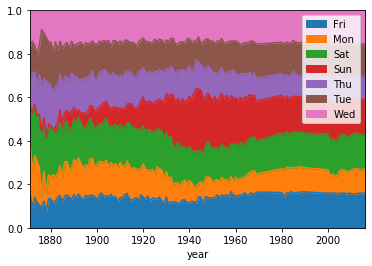

In [8]:
###############################################################################
# Doing some plots on the ratio of games per day
optimized_gl['year'] = optimized_gl.date.dt.year
games_per_day = optimized_gl.pivot_table(
    index='year', columns='day_of_week',
    values='date', aggfunc=len
)
games_per_day = games_per_day.divide(games_per_day.sum(axis=1), axis=0)
ax = games_per_day.plot(kind='area', stacked='true')
ax.legend(loc='upper right')
ax.set_ylim(0, 1)
plt.show()
#plt.close()


In [9]:
###############################################################################
# Loading the dataset by chunks
optimized_gl = pd.read_csv(
    DATA_PATH,
    dtype=dataTypes,
    parse_dates=['date'],
    infer_datetime_format=True,
    low_memory=False,
    chunksize=10000
)
df = pd.DataFrame()
for gm_chunk in optimized_gl:
    df = pd.concat([df, gm_chunk])
    print(len(gm_chunk))
df.head()

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1907


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,1871-05-04,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,1871-05-05,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,1871-05-06,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,1871-05-08,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,1871-05-09,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
